In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


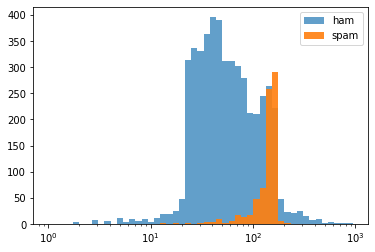

In [8]:
## plot the graph

import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15 ** (np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.7)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.9)
plt.legend(('ham','spam'))
plt.show()

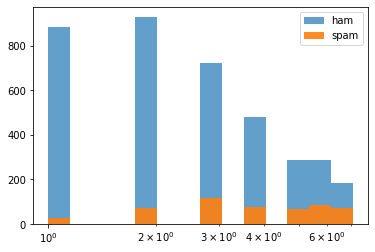

In [9]:
plt.xscale('log')
bins = 1.15 ** (np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'], bins=bins, alpha=0.7)
plt.hist(df[df['label']=='spam']['punct'], bins=bins, alpha=0.9)
plt.legend(('ham','spam'))
plt.show()

In [10]:
## split the data
from sklearn.model_selection import train_test_split

X = df[['length','punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3900, 2) (3900,)
(1672, 2) (1672,)


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
## test accuracy

from sklearn import metrics

prediction = model.predict(X_test)

metrics.accuracy_score(y_test, prediction)


0.8427033492822966

In [13]:
metrics.confusion_matrix(y_test, prediction)

array([[1404,   44],
       [ 219,    5]])

In [14]:
cm_df = pd.DataFrame(metrics.confusion_matrix(y_test,prediction),columns=['ham','spam'], index=['ham','spam'])

cm_df

,ham,spam
ham,1404,44
spam,219,5


In [15]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [16]:
### Multi-nomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

modelnb = MultinomialNB()

modelnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
prediction_nb = modelnb.predict(X_test)

print(metrics.classification_report(y_test,prediction_nb))
print(f'Accuracy Score : {metrics.accuracy_score(y_test,prediction_nb)}')

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672

Accuracy Score : 0.8600478468899522


In [18]:
## support vector machines

from sklearn.svm import SVC

modelsvm = SVC()
modelsvm.fit(X_train, y_train)

prediction_svc = modelsvm.predict(X_test)


print(metrics.classification_report(y_test,prediction_svc))
print(f'Accuracy Score : {metrics.accuracy_score(y_test,prediction_svc)}')

              precision    recall  f1-score   support

         ham       0.88      0.98      0.93      1448
        spam       0.58      0.17      0.26       224

    accuracy                           0.87      1672
   macro avg       0.73      0.58      0.60      1672
weighted avg       0.84      0.87      0.84      1672

Accuracy Score : 0.8720095693779905


### Test Processing

In [19]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3900,) (3900,)
(1672,) (1672,)


- Count Vectorization

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_train_cv = count_vect.fit_transform(X_train)
X_train_cv.shape

(3900, 7263)

- TFIDF (Term Frequency times Inverse Document Frequency)

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_model = TfidfTransformer()

Xtrain_tfidf = tfidf_model.fit_transform(X_train_cv)

Xtrain_tfidf.shape

(3900, 7263)

- TFIDF Vectorizer = Count Vectorizer + TFIDF Transformer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec_model = TfidfVectorizer()

Xtrain_vectfidf = tfidf_vec_model.fit_transform(X_train)

Xtrain_vectfidf.shape

(3900, 7263)

### Model

In [24]:
from sklearn.svm import SVC

model = SVC()

model.fit(Xtrain_vectfidf,y_train) ## fitting the vector idf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Using sklearn-pipeline

In [25]:
from sklearn.pipeline import Pipeline

text_clf_pipeline = Pipeline([('tfidfvector',TfidfVectorizer()),
                              ('SVCModel',SVC())
                             ])

text_clf_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidfvector',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('SVCModel',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape

In [26]:
predictions = text_clf_pipeline.predict(X_test)

metrics.accuracy_score(y_test, predictions)

0.986244019138756

In [27]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.90      0.95       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [30]:
text_clf_pipeline.predict(['hello, Rishu you have won a Free entry in 2 a wkly comp to win FA Cup'])

array(['spam'], dtype=object)